# Working with Vector Data

## Creating polygon geometry with OGR

In [12]:
from osgeo import ogr

In [15]:
r = ogr.Geometry(ogr.wkbLinearRing)
r.AddPoint(1,1)
r.AddPoint(5,1)
r.AddPoint(5,5)
r.AddPoint(1,5)
r.AddPoint(1,1)
poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(r)
print(poly.ExportToWkt())

POLYGON ((1 1 0,5 1 0,5 5 0,1 5 0,1 1 0))


## Creating polygon geometry from GeoJSON

In [17]:
geojson = """{"type":"Polygon","coordinates":[[[1,1],[5,1],[5,5],[1,5],[1,1]]]}"""
polygon = ogr.CreateGeometryFromJson(geojson)
print(polygon)

POLYGON ((1 1,5 1,5 5,1 5,1 1))


## Basic geometry operations

In [18]:
# 1 create area

print("The area of our polygon is %d" %polygon.Area())

The area of our polygon is 16


In [19]:
# 2 calculate centroid of polygon

cen = polygon.Centroid()
print(cen)

POINT (3 3)


In [20]:
# 3 Get the boundary

b = polygon.GetBoundary()
print(b)

LINESTRING (1 1,5 1,5 5,1 5,1 1)


In [21]:
# 4 convex bull does the same in this case as boundary, as our polygon is square:

ch = polygon.ConvexHull()
print(ch)

POLYGON ((1 1,1 5,5 5,5 1,1 1))


In [22]:
# 5 buffer. A buffer value of 0 (zero) returns the same values as boundary and convex hull in this example:

buffer = polygon.Buffer(0)
print(buffer)

POLYGON ((1 1,1 5,5 5,5 1,1 1))


In [24]:
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(10,10)
polygon.Contains(point)

False

## Writing polygon data to a newly created shapefile

In [25]:
import osgeo.ogr, osgeo.osr

In [31]:
#1 set the spatial reference

spatialReference = osgeo.osr.SpatialReference()
spatialReference.ImportFromProj4('+proj=longlat +ells=WGS84+datum=WGS +no_defs')

5

In [32]:
#2 create a new shapefile
driver = osgeo.ogr.GetDriverByName('ESRI Shapefile')
shapeData = driver.CreateDataSource('my_polygon.shp')

In [33]:
#3 create the layer
layer = shapeData.CreateLayer('polygon_layer',spatialReference, osgeo.ogr.wkbPolygon)
layerDefinition = layer.GetLayerDefn()

In [34]:
#4 geometry is put inside feature
featureIndex = 0
feature = osgeo.ogr.Feature(layerDefinition)
feature.SetGeometry(polygon)
feature.SetFID(featureIndex)

0

In [35]:
#5 feature is put into layer
layer.CreateFeature(feature)

0

In [37]:
#6 check if the file has been created correctly
!ogrinfo my_polygon.shp

INFO: Open of `my_polygon.shp'
      using driver `ESRI Shapefile' successful.
1: my_polygon (Polygon)


## Using a spatial filter to select features

In [38]:
# import modules
from osgeo import ogr
import os

#reference the shapefile and specify driver type
shapefile = r"Data/10m_cultural/ne_10m_populated_places.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")

#open the data source with driver, zero means open in read-only mode
dataSource = driver.Open(shapefile, 0)

#use the GetLayer() function for referencing the layer that holds the data
layer = dataSource.GetLayer()

#pass in the coordinates for the data frame to the SetSpatialFilterRect() function. This filter creates a rectangular extent and selects the features inside the extent

layer.SetSpatialFilterRect(-102, 26, -94, 36) 
for feature in layer:
    # select only the cities inside of the USA
    # we can do this through a SQL query:
    # we skip the ities inside of the USA,
    # and print the names of the cities that are
    if feature.GetField("ADM0NAME") != "United States of America":
             continue
    else:
            print(feature.GetField("NAME"))

Ardmore
McAlester
Bryan
San Marcos
Longview
McAllen
Harlingen
Alice
New Braunfels
Cleburne
Brownwood
Big Spring
Vernon
Childress
Texas City
Pasadena
Baytown
Arlington
Texarkana
Fort Smith
Lawton
Norman
Muskogee
Shawnee
Conroe
Nacogdoches
Eagle Pass
Edinburg
Kingsville
Huntsville
Killeen
Lufkin
Del Rio
San Angelo
Sherman
Beaumont
Bay City
Port Lavaca
Falfurrias
Beeville
Dumas
Denton
Temple
Galveston
Freeport
Victoria
Wichita Falls
Waco
Lubbock
Abilene
Tyler
Ft. Worth
Corpus Christi
Austin
Amarillo
Laredo
Oklahoma City
San Antonio
Dallas
Houston


## Creating geometries with Shapely

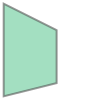

In [39]:
from shapely.geometry import Polygon
p1 = Polygon(((1, 2), (5, 3), (5, 7), (1, 9), (1, 2)))
p2 = Polygon(((6,6), (7,6), (10,4), (11,8), (6,6)))
p1

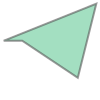

In [40]:
# A new command line is required for printing the second polygon:
p2

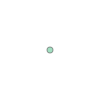

In [41]:
# Point takes tuples as well as positional coordinate values

from shapely.geometry import Point
point = Point(2.0, 2.0)
q = Point((2.0, 2.0))
q

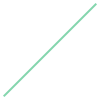

In [42]:
# line geometry

from shapely.geometry import LineString
line = LineString([(0, 0), (10,10)])
line

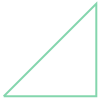

In [43]:
# linear rings

from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0,0), (3,3), (3,0)])
ring

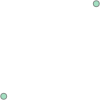

In [44]:
# collection of points

from shapely.geometry import MultiPoint
points = MultiPoint([(0.0, 0.0), (3.0, 3.0)])
points

In [47]:
# collection of lines

from shapely.geometry import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
coords

[((0, 0), (1, 1)), ((-1, 0), (1, 0))]

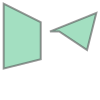

In [48]:
# collection of polygons

from shapely.geometry import MultiPolygon
polygons = MultiPolygon([p1, p2,])
polygons

## Applying geometrical methods with Shapely

In [51]:
print(p1.area)
print(p1.bounds)
print(p1.length)
print(p1.geom_type)

22.0
(1.0, 2.0, 5.0, 9.0)
19.59524158061724
Polygon


## Reading JSON geometries with Shapely

In [53]:
import json
from shapely.geometry import mapping, shape
p = shape(json.loads('{"type": "Polygon", "coordinates":[[[1,1], [1,3 ], [3,3]]]}'))
print(json.dumps(mapping(p)))
p.area

{"type": "Polygon", "coordinates": [[[1.0, 1.0], [1.0, 3.0], [3.0, 3.0], [1.0, 1.0]]]}


2.0

## Reading data with Fiona

In [54]:
import fiona
c = fiona.open(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")
rec = next(iter(c))
rec.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [55]:
import pprint
pprint.pprint(rec['type'])
pprint.pprint(rec['id'])
pprint.pprint(rec['properties'])
pprint.pprint(rec['geometry'])

'Feature'
'0'
OrderedDict([('featurecla', 'Admin-1 scale rank'),
             ('scalerank', 2),
             ('adm1_code', 'USA-3514'),
             ('diss_me', 3514),
             ('iso_3166_2', 'US-MN'),
             ('wikipedia', 'http://en.wikipedia.org/wiki/Minnesota'),
             ('iso_a2', 'US'),
             ('adm0_sr', 1),
             ('name', 'Minnesota'),
             ('name_alt', 'MN|Minn.'),
             ('name_local', None),
             ('type', 'State'),
             ('type_en', 'State'),
             ('code_local', 'US27'),
             ('code_hasc', 'US.MN'),
             ('note', None),
             ('hasc_maybe', None),
             ('region', 'Midwest'),
             ('region_cod', None),
             ('provnum_ne', 0),
             ('gadm_level', 1),
             ('check_me', 20),
             ('datarank', 1),
             ('abbrev', 'Minn.'),
             ('postal', 'MN'),
             ('area_sqkm', 0),
             ('sameascity', -99),
             ('labelran

In [57]:
print(len(c)) # prints total amount of features
print(c.driver) # prints driver name
print(c.crs) # prints coordinate reference system of data file

51
ESRI Shapefile
{'init': 'epsg:4326'}


## Accessing vector geometry in shapefiles using Shapely and Fiona

In [58]:
import pprint, fiona
with fiona.open\
(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp") as src:
    pprint.pprint(src[0])

{'geometry': {'coordinates': [[(-89.95765601272012, 47.286907253603175),
                               (-90.13175391311144, 47.29274669045216),
                               (-90.30585181350276, 47.29801768654593),
                               (-90.47994971389409, 47.30385712339489),
                               (-90.6540476142854, 47.309128119488676),
                               (-90.85778194859611, 47.21282908791278),
                               (-91.06097368036777, 47.117046820659795),
                               (-91.26470801467849, 47.02126455340681),
                               (-91.46844234898919, 46.9249655218309),
                               (-91.59225908076053, 46.876260484395914),
                               (-91.71661841507091, 46.82760712339301),
                               (-91.8409777493813, 46.778385321635),
                               (-91.96479448115262, 46.72970612241605),
                               (-92.01189754918667, 46.7117227239

In [59]:
from shapely.geometry import shape
minnesota = {'type': 'Polygon', 'coordinates':
[[(-89.95765601272012, 47.286907253603175),
                               (-90.13175391311144, 47.29274669045216),
                               (-90.30585181350276, 47.29801768654593),
                               (-90.47994971389409, 47.30385712339489),
                               (-90.6540476142854, 47.309128119488676),
                               (-90.85778194859611, 47.21282908791278),
                               (-91.06097368036777, 47.117046820659795),
                               (-91.26470801467849, 47.02126455340681),
                               (-91.46844234898919, 46.9249655218309),
                               (-91.59225908076053, 46.876260484395914),
                               (-91.71661841507091, 46.82760712339301),
                               (-91.8409777493813, 46.778385321635),
                               (-91.96479448115262, 46.72970612241605),
                               (-92.01189754918667, 46.71172272397848),
                               (-92.27487891312, 46.65614472104858),
                               (-92.26482784703924, 46.09522288673644),
                               (-92.2965830146826, 46.09628225359842),
                               (-92.54369971390233, 45.98569468849381),
                               (-92.75696834997089, 45.88991242124082),
                               (-92.89982784704182, 45.705763454768714),
                               (-92.68922054723626, 45.51843638771068),
                               (-92.76541744665064, 45.26708222104298),
                               (-92.76647681351261, 44.9961426865367),
                               (-92.79665584997105, 44.77602692318949),
                               (-92.50507158076417, 44.58391978614445),
                               (-92.38549231644078, 44.57492808692567),
                               (-92.06215287959051, 44.43258535417769),
                               (-91.949989183301, 44.364837551443046),
                               (-91.87960588251947, 44.25742808692439),
                               (-91.62770911331273, 44.085448920257036),
                               (-91.28959021682704, 43.93729258887629),
                               (-91.25729244664458, 43.854739488289965),
                               (-91.2546569485977, 43.61397899024206),
                               (-91.22819861526426, 43.5012468531974),
                               (-92.54000484899348, 43.51977285417405),
                               (-94.00102678096546, 43.51341665300214),
                               (-95.35993608272871, 43.50018748633542),
                               (-96.4526600817565, 43.50178945573647),
                               (-96.43943091508982, 44.43576345476367),
                               (-96.56061214881424, 45.39301768653837),
                               (-96.73576941606754, 45.47081655535372),
                               (-96.83470394569034, 45.62532908790642),
                               (-96.78072791216147, 45.76079885515958),
                               (-96.55689144568922, 45.87244578712617),
                               (-96.53945064979075, 46.017966620460186),
                               (-96.53890804725165, 46.199480088885366),
                               (-96.60135901567638, 46.3513571233911),
                               (-96.68548824744755, 46.51328522397769),
                               (-96.73365068234358, 46.71647695574927),
                               (-96.7458204821483, 46.9445250514533),
                               (-96.77969438351563, 46.999043687521294),
                               (-96.82041541216165, 47.29220408791309),
                               (-96.82465287960957, 47.42661448830425),
                               (-96.84423824744819, 47.54619375262766),
                               (-96.89397681352912, 47.74886872007637),
                               (-97.01515804725355, 47.954205023788134),
                               (-97.13104244666809, 48.13729462339825),
                               (-97.14850908078273, 48.31878225360731),
                               (-97.16122148312654, 48.51458425556122),
                               (-97.12734758175921, 48.64212169045756),
                               (-97.1204746162644, 48.75852285419501),
                               (-97.21413814979343, 48.90244171812793),
                               (-97.22894344764504, 49.00088532164389),
                               (-95.15883724646483, 48.9998259547819),
                               (-95.15620174841791, 49.38401439065592),
                               (-94.81754024939323, 49.38928538674975),
                               (-94.64026424841592, 48.84001658791925),
                               (-94.32912044958647, 48.670672919298795),
                               (-93.63061011429733, 48.60928131773602),
                               (-92.60984554723586, 48.45001455341253),
                               (-91.63987891311746, 48.13993012144516),
                               (-90.83026424840062, 48.27010305438836),
                               (-89.59995174839577, 48.01027395282483),
                               (-89.59940914585667, 48.01027395282483),
                               (-89.4900319346622, 48.01340602289096),
                               (-89.52269548211933, 47.96053538674391),
                               (-89.61369767938538, 47.81925202085796),
                               (-89.72800594761503, 47.641976019880644),
                               (-89.84283098016755, 47.464725857119504),
                               (-89.95765601272012, 47.286907253603175)]]}

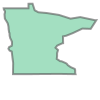

In [60]:
geom = shape(minnesota)
geom

## Selecting and plotting geometry data with GeoPandas and Matplotlib

In [61]:
import geopandas as gpd
%matplotlib inline
df = gpd.read_file\
(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")
df

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,Minnesota,Minnesota,Minnesota,Миннесота,Minnesota,Minnesota,Minnesota,明尼蘇達州,1159315297,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,Montana,Montana,Montana,Монтана,Montana,Montana,Montana,蒙大拿州,1159315333,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,North Dakota,Dakota Północna,Dakota do Norte,Северная Дакота,North Dakota,Kuzey Dakota,Bắc Dakota,北达科他州,1159315337,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,Hawaï,Hawaje,Havaí,Гавайи,Hawaii,Hawaii,Hawaii,夏威夷州,1159308409,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,Idaho,Idaho,Idaho,Айдахо,Idaho,Idaho,Idaho,爱达荷州,1159315339,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,Washington,Waszyngton,Washington,Вашингтон,Washington,Vaşington,Washington,华盛顿州,1159309547,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."
6,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,Arizona,Arizona,Arizona,Аризона,Arizona,Arizona,Arizona,亞利桑那州,1159315341,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,Californië,Kalifornia,Califórnia,Калифорния,Kalifornien,Kaliforniya,California,加利福尼亚州,1159308415,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
8,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,Colorado,Kolorado,Colorado,Колорадо,Colorado,Colorado,Colorado,科羅拉多州,1159315343,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
9,Admin-1 scale rank,2,USA-3523,3523,US-NV,http://en.wikipedia.org/wiki/Nevada,US,1,Nevada,NV|Nev.,...,Nevada,Nevada,Nevada,Невада,Nevada,Nevada,Nevada,内华达州,1159315345,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


In [62]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [63]:
df.shape

(51, 84)

In [64]:
df.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt', 'name_local',
       'type', 'type_en', 'code_local', 'code_hasc', 'note', 'hasc_maybe',
       'region', 'region_cod', 'provnum_ne', 'gadm_level', 'check_me',
       'datarank', 'abbrev', 'postal', 'area_sqkm', 'sameascity', 'labelrank',
       'name_len', 'mapcolor9', 'mapcolor13', 'fips', 'fips_alt', 'woe_id',
       'woe_label', 'woe_name', 'latitude', 'longitude', 'sov_a3', 'adm0_a3',
       'adm0_label', 'admin', 'geonunit', 'gu_a3', 'gn_id', 'gn_name',
       'gns_id', 'gns_name', 'gn_level', 'gn_region', 'gn_a1_code',
       'region_sub', 'sub_code', 'gns_level', 'gns_lang', 'gns_adm1',
       'gns_region', 'min_label', 'max_label', 'min_zoom', 'wikidataid',
       'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es', 'name_fr',
       'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it', 'name_ja',
       'name_ko', 'name_nl', 'name_pl', 'name_

In [65]:
df.loc[0]

featurecla                                   Admin-1 scale rank
scalerank                                                     2
adm1_code                                              USA-3514
diss_me                                                    3514
iso_3166_2                                                US-MN
                                    ...                        
name_tr                                               Minnesota
name_vi                                               Minnesota
name_zh                                                   明尼蘇達州
ne_id                                                1159315297
geometry      POLYGON ((-89.95765601272012 47.28690725360318...
Name: 0, Length: 84, dtype: object

In [66]:
df['name']

0                Minnesota
1                  Montana
2             North Dakota
3                   Hawaii
4                    Idaho
5               Washington
6                  Arizona
7               California
8                 Colorado
9                   Nevada
10              New Mexico
11                  Oregon
12                    Utah
13                 Wyoming
14                Arkansas
15                    Iowa
16                  Kansas
17                Missouri
18                Nebraska
19                Oklahoma
20            South Dakota
21               Louisiana
22                   Texas
23             Connecticut
24           Massachusetts
25           New Hampshire
26            Rhode Island
27                 Vermont
28                 Alabama
29                 Florida
30                 Georgia
31             Mississippi
32          South Carolina
33                Illinois
34                 Indiana
35                Kentucky
36          North Carolina
3

In [67]:
california = df.loc[df['name'] == "California"]
california

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,Californië,Kalifornia,Califórnia,Калифорния,Kalifornien,Kaliforniya,California,加利福尼亚州,1159308415,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."


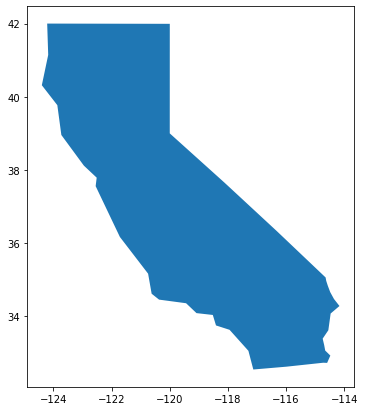

In [68]:
california.plot(figsize=(7,7))

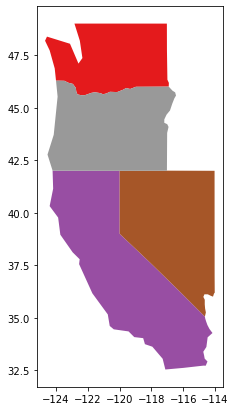

In [69]:
multipl = df.iloc[[5,7,9,11]]
multipl.plot(cmap="Set1", figsize=(7,7))

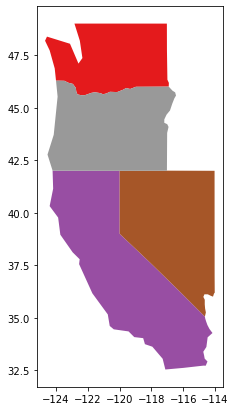

In [72]:
exp = df.cx[-124:-118,30:50]
exp.plot(cmap="Set1", figsize=(7,7))

## Mapping wildfire data with GeoPandas

In [73]:
import geopandas

In [74]:
states = geopandas.read_file(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")

In [75]:
states

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,Minnesota,Minnesota,Minnesota,Миннесота,Minnesota,Minnesota,Minnesota,明尼蘇達州,1159315297,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,Montana,Montana,Montana,Монтана,Montana,Montana,Montana,蒙大拿州,1159315333,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,North Dakota,Dakota Północna,Dakota do Norte,Северная Дакота,North Dakota,Kuzey Dakota,Bắc Dakota,北达科他州,1159315337,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,Hawaï,Hawaje,Havaí,Гавайи,Hawaii,Hawaii,Hawaii,夏威夷州,1159308409,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,Idaho,Idaho,Idaho,Айдахо,Idaho,Idaho,Idaho,爱达荷州,1159315339,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,Washington,Waszyngton,Washington,Вашингтон,Washington,Vaşington,Washington,华盛顿州,1159309547,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."
6,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,Arizona,Arizona,Arizona,Аризона,Arizona,Arizona,Arizona,亞利桑那州,1159315341,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,Californië,Kalifornia,Califórnia,Калифорния,Kalifornien,Kaliforniya,California,加利福尼亚州,1159308415,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
8,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,Colorado,Kolorado,Colorado,Колорадо,Colorado,Colorado,Colorado,科羅拉多州,1159315343,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
9,Admin-1 scale rank,2,USA-3523,3523,US-NV,http://en.wikipedia.org/wiki/Nevada,US,1,Nevada,NV|Nev.,...,Nevada,Nevada,Nevada,Невада,Nevada,Nevada,Nevada,内华达州,1159315345,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


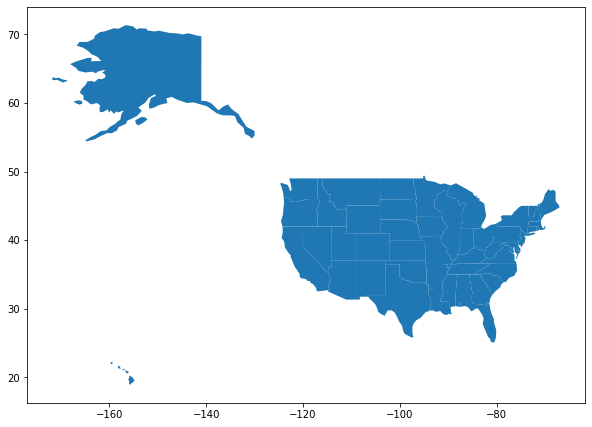

In [76]:
%matplotlib inline
states.plot(figsize=(10,10))

In [77]:
fires = geopandas.read_file(r"Data/mtbs_FODpoints_DD/mtbs_FODpoints_DD.shp")
fires

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,AK6201316162819840703,None,KUYUKUTUK,Wildfire,4555,MTBS,Extended (SS),8479,62.013,-161.628,...,-9999,-9999,9999,9999,370,125,-9999,None,0,POINT (-3615205.561 5553809.210)
1,AK6375715753719840609,None,WAPOO FIRE,Wildfire,4546,MTBS,Extended (SS),37083,63.757,-157.537,...,-9999,-9999,9999,9999,450,300,200,None,1,POINT (-3322193.047 5536294.322)
2,AK6379515502919840623,None,414060,Wildfire,4551,MTBS,Extended (SS),1399,63.795,-155.029,...,-9999,-9999,9999,9999,430,115,-30,None,2,POINT (-3203047.548 5453089.349)
3,AK6393015752719840606,None,MUD FIRE,Wildfire,4545,MTBS,Extended (SS),10243,63.930,-157.527,...,-9999,-9999,9999,9999,475,335,225,Hard to determine fire perimeter,3,POINT (-3311870.046 5549022.617)
4,AK6448214467319840607,None,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,...,-9999,-9999,9999,9999,550,165,-20,None,4,POINT (-2665533.025 5187787.509)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25609,WY4379410794120180726,6F8F8FF2-6B6D-47E6-9876-57603F2F502A,POTTER BUTTE,Wildfire,10011374,MTBS,Initial,2444,43.788,-107.925,...,22,9,-970,-150,40,200,9999,None,25609,POINT (-953538.100 2370593.288)
25610,WY4381010781320180813,B837C791-75C4-4A86-B174-6925188F8A43,DENVER JAKE,Wildfire,10011325,MTBS,Initial,6973,43.787,-107.783,...,45,12,-970,-150,40,250,9999,None,25610,POINT (-942176.483 2369432.338)
25611,WY4410810779120180708,902BC4C0-7DE1-4B1C-9DCE-99EED76312BD,TEREK,Wildfire,10011328,MTBS,Initial,43872,44.162,-107.805,...,19,25,-970,-150,10,9999,9999,This mapping included the Apache East fire. Th...,25611,POINT (-938507.548 2410363.268)
25612,WY4421310768820180614,07A83678-540D-4D0F-A864-446A75A6DFD0,WEINTZ,Wildfire,10011337,MTBS,Initial,2009,44.199,-107.67,...,20,7,-970,-150,50,285,9999,None,25612,POINT (-927470.368 2413512.248)


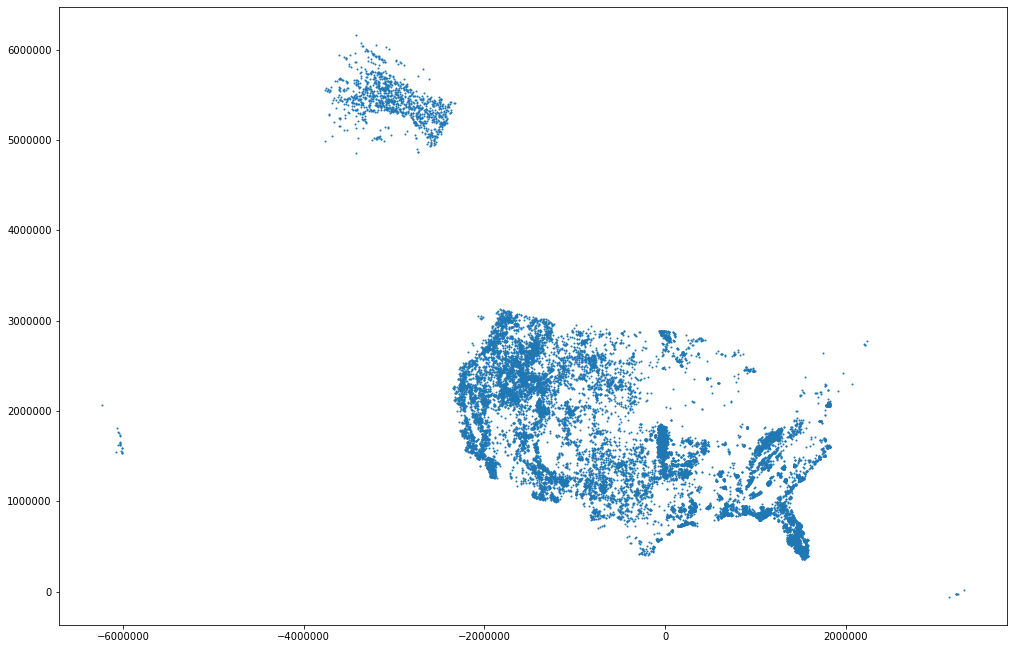

In [78]:
fires.plot(markersize=1, figsize=(17,17))

In [79]:
fires.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [80]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
fires = fires.to_crs("epsg:4326")

In [82]:
state_fires = geopandas.sjoin(fires,states[['name','geometry']].copy(),op='within')
state_fires

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry,index_right,name
0,AK6201316162819840703,None,KUYUKUTUK,Wildfire,4555,MTBS,Extended (SS),8479,62.013,-161.628,...,9999,9999,370,125,-9999,None,0,POINT (-161.62785 62.01330),50,Alaska
1,AK6375715753719840609,None,WAPOO FIRE,Wildfire,4546,MTBS,Extended (SS),37083,63.757,-157.537,...,9999,9999,450,300,200,None,1,POINT (-157.53650 63.75705),50,Alaska
2,AK6379515502919840623,None,414060,Wildfire,4551,MTBS,Extended (SS),1399,63.795,-155.029,...,9999,9999,430,115,-30,None,2,POINT (-155.02879 63.79490),50,Alaska
3,AK6393015752719840606,None,MUD FIRE,Wildfire,4545,MTBS,Extended (SS),10243,63.930,-157.527,...,9999,9999,475,335,225,Hard to determine fire perimeter,3,POINT (-157.52689 63.92984),50,Alaska
4,AK6448214467319840607,None,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,...,9999,9999,550,165,-20,None,4,POINT (-144.67325 64.48231),50,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22283,IL3751008845020160405,None,UNNAMED,Prescribed Fire,26740,MTBS,Initial,1299,37.511,-88.45,...,-970,-150,50,9999,9999,None,22283,POINT (-88.44622 37.50971),33,Illinois
23612,IL3732108936620170304,None,UNNAMED,Prescribed Fire,10009401,MTBS,Initial,1257,37.32,-89.367,...,-970,-150,30,9999,9999,None,23612,POINT (-89.36596 37.32088),33,Illinois
23613,IL3763808843120170310,None,UNNAMED,Prescribed Fire,10009924,MTBS,Initial,994,37.642,-88.426,...,-970,-150,80,9999,9999,None,23613,POINT (-88.43034 37.64201),33,Illinois
23614,IL4136408815720170408,None,UNNAMED,Prescribed Fire,10009377,MTBS,Initial,549,41.37,-88.158,...,-970,-150,-9999,9999,9999,None,23614,POINT (-88.15878 41.37090),33,Illinois


In [83]:
counts_per_state = state_fires.groupby('name').size()
counts_per_state.sort_values(axis=0, ascending=False)

name
Florida           4661
Kansas            1868
California        1776
Idaho             1438
Texas             1246
Alaska            1173
Oklahoma          1022
Arizona           1018
Nevada             951
Oregon             943
New Mexico         907
Montana            739
Utah               643
Mississippi        635
Alabama            595
Louisiana          592
South Carolina     564
Washington         510
Arkansas           484
Georgia            449
Wyoming            400
Minnesota          375
Colorado           348
Kentucky           330
West Virginia      303
Missouri           253
North Carolina     233
South Dakota       221
Tennessee          194
Virginia           121
New Jersey         107
Nebraska            98
North Dakota        72
Michigan            62
Wisconsin           38
Maryland            33
Indiana             32
Hawaii              18
Illinois            16
Pennsylvania        15
New York            10
Iowa                 9
Maine                4
Delawa

In [84]:
states = states.merge(counts_per_state.reset_index(name='number_of_fires'))
states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry,number_of_fires
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,Minnesota,Minnesota,Миннесота,Minnesota,Minnesota,Minnesota,明尼蘇達州,1159315297,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",375
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,Montana,Montana,Монтана,Montana,Montana,Montana,蒙大拿州,1159315333,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",739
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,Dakota Północna,Dakota do Norte,Северная Дакота,North Dakota,Kuzey Dakota,Bắc Dakota,北达科他州,1159315337,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",72
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,Hawaje,Havaí,Гавайи,Hawaii,Hawaii,Hawaii,夏威夷州,1159308409,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",18
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,Idaho,Idaho,Айдахо,Idaho,Idaho,Idaho,爱达荷州,1159315339,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",1438


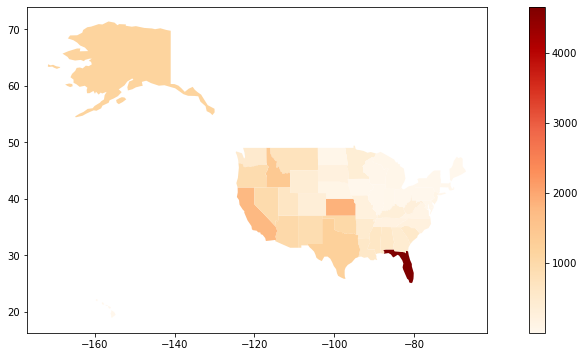

In [85]:
ax = states.plot(column='number_of_fires', figsize=(15, 6),
cmap='OrRd', legend=True)

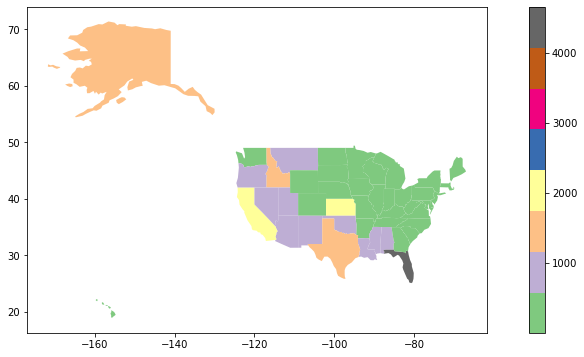

In [86]:
ax = states.plot(column='number_of_fires', figsize=(15, 6),
cmap='Accent', legend=True)

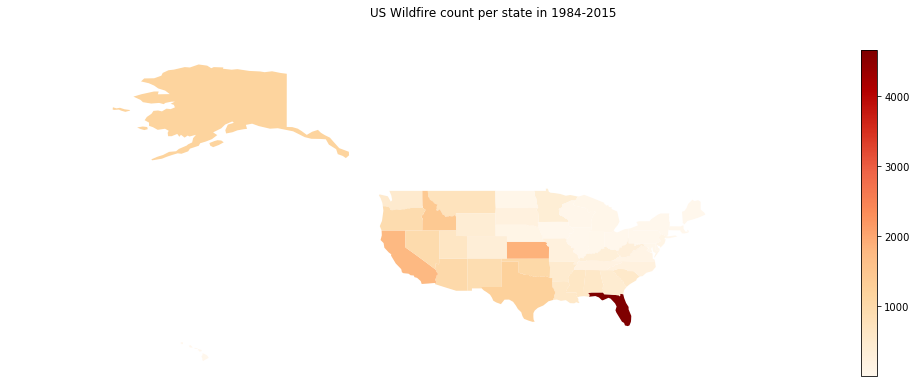

In [87]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(18,6))
ax = states.plot(column='number_of_fires', cmap='OrRd',
legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire count per state in 1984-2015')
ax.set_axis_off()
plt.show()

## Why data inspection matters

In [88]:
len(fires.index)

25614

In [89]:
counts_per_state.sum()

25511

In [90]:
fires.empty #checks if there are empty fields in the dataframe

False

In [91]:
fires['geometry'].empty

False